# Visualizar como una IA predice un nuevo texto del Quijote

**Objetivo**
En base a un modelo propio de **Deep Learning** creado con los 50 primeros capitulos del Quijote, vamos a mostrar de manera visual como una Red Neuronal puede predecir una palabra siguiente a la otra basada en una cercania matemática.<br>

El modelo es capaz de crear un nuevo texto de 50 palabras en función a una frase dada y contextualizada en el libro del Quijote.

In [29]:
#Cargamos las librerias necesarias
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
import numpy as np
import re, os

## Cargamos el modelo pre-entrenado y los datos (50 capitulos)

In [30]:
#Almacenar los datos del libro.
def load_QuijoteNLP(file="Dataset\quijote_Lite.txt", model="AppQuijote\model\Model_complet_QuijoteNLP69.h5"):
   
    tokenizer = Tokenizer()
    
    data = open(file, encoding="utf8").read()
    
    #Limpiar de simbolos 
    data = re.sub('[^a-zA-Z0-9á-ú\¿\?\n\.]', ' ', data)
    corpus = data.lower().split("\n")
    corpus = sorted(list(set(corpus)))
    
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    adam = Adam(lr=0.001)
    model = tf.keras.models.load_model(model)
    
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # summarize model.
    
    return model.summary(), model, tokenizer


**Visualizamos la estructura de nuestro modelo**

In [31]:
summary, model, tokenizer=load_QuijoteNLP()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 18, 50)            692500    
_________________________________________________________________
lstm_2 (LSTM)                (None, 18, 100)           60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 13850)             1398850   
Total params: 2,242,250
Trainable params: 2,242,250
Non-trainable params: 0
_________________________________________________________________


***Creamos una función para predecir el nuevo texto***
* Entrando como parametros:
    * Frase introductoria
    * Palabras a predecir
    * Modelo usado
    * Tokenizador

In [32]:
def predict_text(seed_text, next_words=50, model=model, tokenizer=tokenizer):
    for _ in range(next_words):
            token_list = tokenizer.texts_to_sequences([seed_text])[0]
            #print(token_list)
            token_list = pad_sequences([token_list], 18, padding='pre')

            predicted = model.predict_classes(token_list, verbose=0)
            #print(predicted)
            output_word = ""
            for word, index in tokenizer.word_index.items():
                if index == predicted:
                    output_word = word
                    break
            seed_text += " " + output_word
    return print(seed_text)

#### Creación del texto

In [33]:
predict_text("Valiente caballero")

C:\Users\Educacem\Anaconda3\envs\MasterIA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Valiente caballero procurando y lo que no falte nada el tiempo le place dijo a mí estamos es mujer y a efeto lo estaba un hermoso y y de esa edad delante y que le hubiera y allí no han de quedar como un rabel y que vienen a los ojos la


In [34]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(13850, 50)


In [35]:
#cantidad de palabras unicas
len(tokenizer.word_index.keys())

13849

# Preparación para la visualización

# PCA (2 dimensiones)
El análisis de componentes principales (PCA) es una técnica de transformación lineal simple pero popular y útil que se utiliza en numerosas aplicaciones, como predicciones del mercado de valores, análisis de datos de expresión génica y muchas más.
El objetivo es reducir las dimensiones de un conjunto de datos d-dimensionales al proyectarlo en un subespacio (k) -dimensional (donde k <d) para aumentar la eficiencia computacional mientras se retiene la mayor parte de la información.
* Estandarizar los datos.
* Obtenga los vectores propios y los valores propios de la matriz de covarianza o matriz de correlación, o realice la descomposición vectorial singular.
* Ordene los valores propios en orden descendente y elija los k vectores propios que corresponden a los k valores propios más grandes donde k es el número de dimensiones del nuevo subespacio de entidad (k≤d) /.
* Construya la matriz de proyección W a partir de los k vectores propios seleccionados.
* Transforme el conjunto de datos original X a través de W para obtener un subespacio de entidad k-dimensional Y.

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from IPython.display import display, Math, Latex

In [37]:
#Escalamos los datos 
weights_std=StandardScaler().fit_transform(weights)

## Vectores Propios y Valores Propios

Los vectores propios y los valores propios de una matriz de covarianza (o correlación) representan el "núcleo" de un PCA: los vectores propios (componentes principales) determinan las direcciones del nuevo espacio de características, y los valores propios determinan su magnitud. En otras palabras, los valores propios explican la varianza de los datos a lo largo de los nuevos ejes de características.

### Matriz de Covarianza
El enfoque clásico para PCA es realizar la descomposición propia en la matriz de covarianza Σ, que es una matriz d × d donde cada elemento representa la covarianza entre dos características. La covarianza entre dos características se calcula de la siguiente manera:

In [38]:
#Latex
display(Math(r"\sum=\frac{1}{n-1}((X-\hat{x})^T(X-\hat{x}))"))
display(Math(r"Donde\ \hat{x}=\frac{1}{n}\sum_{k=1}^nx_i"))
display(Math(r"M_{cov}=\begin{equation} \begin{pmatrix}Var(x) &  Cov(x,y)\\Cov(y,x) & Var(y)\end{pmatrix}\end{equation}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
mean_vec = np.mean(weights_std, axis=0)
cov_mat = (weights_std - mean_vec).T.dot((weights_std - mean_vec)) / (weights_std.shape[0]-1)
print('Matriz de Covarianza \n%s' %cov_mat)
print("Con dimensión: " + str(cov_mat.shape))

Matriz de Covarianza 
[[ 1.0000722   0.13187133  0.18716617 ...  0.02948952 -0.1643797
   0.11100254]
 [ 0.13187133  1.0000722   0.16374545 ...  0.00112648 -0.04996751
   0.38746083]
 [ 0.18716617  0.16374545  1.0000722  ... -0.04108383 -0.08837213
   0.06481973]
 ...
 [ 0.02948952  0.00112648 -0.04108383 ...  1.0000722  -0.08115978
   0.065148  ]
 [-0.1643797  -0.04996751 -0.08837213 ... -0.08115978  1.0000722
  -0.06625024]
 [ 0.11100254  0.38746083  0.06481973 ...  0.065148   -0.06625024
   1.0000722 ]]
Con dimensión: (50, 50)


In [40]:
#Podemos crearla simplemente usando la libreria numpy
print('NumPy Matriz de covarianza: \n%s' %np.cov(weights_std.T))

NumPy Matriz de covarianza: 
[[ 1.00007221  0.13187132  0.18716616 ...  0.02948953 -0.1643797
   0.11100256]
 [ 0.13187132  1.00007221  0.16374543 ...  0.00112648 -0.0499675
   0.38746086]
 [ 0.18716616  0.16374543  1.00007221 ... -0.04108382 -0.08837213
   0.06481973]
 ...
 [ 0.02948953  0.00112648 -0.04108382 ...  1.00007221 -0.08115978
   0.06514799]
 [-0.1643797  -0.0499675  -0.08837213 ... -0.08115978  1.00007221
  -0.06625025]
 [ 0.11100256  0.38746086  0.06481973 ...  0.06514799 -0.06625025
   1.00007221]]


In [41]:
#Vectores y Valores Propios
cov_matriz=np.cov(weights_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Vectores Propios \n%s' %eig_vecs)
print('\nValores Propios \n%s' %eig_vals)

Vectores Propios 
[[-0.19438821 -0.01999962  0.19061929 ... -0.04545725  0.16717401
   0.02751946]
 [-0.1906926  -0.2622527  -0.05735096 ... -0.14415315  0.01368786
  -0.17186695]
 [-0.16014397 -0.08913724  0.2856333  ...  0.06113843  0.08622642
   0.02670245]
 ...
 [-0.13564895  0.06524353 -0.07495434 ... -0.04347507  0.34106553
   0.060968  ]
 [ 0.183891    0.04827864 -0.109056   ...  0.10448841  0.03292888
  -0.0425726 ]
 [-0.21125458 -0.17719805 -0.14048587 ... -0.04287327 -0.05824078
   0.08214361]]

Valores Propios 
[3.9429147  3.7315855  2.5983028  2.4021192  2.1247253  1.8761407
 1.7311645  1.6776831  1.4742591  1.4197663  1.2262303  1.21287
 1.1342778  1.0735832  1.0056279  0.96827686 0.9150385  0.88196003
 0.87165695 0.34326968 0.8357707  0.38009802 0.788427   0.77002376
 0.74869585 0.7472447  0.71789724 0.7122296  0.3946434  0.40220258
 0.68715674 0.6692021  0.4232593  0.43126842 0.43851328 0.4539553
 0.64160043 0.6290699  0.61779535 0.48121884 0.484327   0.49614182
 0.50896

Para decidir qué vectores propios se pueden eliminar sin perder demasiada información para la construcción del subespacio de dimensiones más bajas, debemos inspeccionar los valores propios correspondientes: los vectores propios con los valores propios más bajos tienen la menor información sobre la distribución de los datos 

In [42]:
# Hacemos una lista (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Valores propios en orden descendente:')
for i in eig_pairs:
    print(i[0])

Valores propios en orden descendente:
3.9429147
3.7315855
2.5983028
2.4021192
2.1247253
1.8761407
1.7311645
1.6776831
1.4742591
1.4197663
1.2262303
1.21287
1.1342778
1.0735832
1.0056279
0.96827686
0.9150385
0.88196003
0.87165695
0.8357707
0.788427
0.77002376
0.74869585
0.7472447
0.71789724
0.7122296
0.68715674
0.6692021
0.64160043
0.6290699
0.61779535
0.59909886
0.585815
0.5722475
0.56095374
0.553487
0.5426429
0.518208
0.50896347
0.49614182
0.484327
0.48121884
0.4539553
0.43851328
0.43126842
0.4232593
0.40220258
0.3946434
0.38009802
0.34326968


Reduciendo el espacio de características de 50 dimensiones a un subespacio de características de 2 dimensiones, eligiendo los vectores propios "superiores 2" con los valores propios más altos para construir nuestra matriz de vectores propios d × k-dimensional W.

In [43]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(50,1), 
                      eig_pairs[1][1].reshape(50,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.19438821 -0.01999962]
 [-0.1906926  -0.2622527 ]
 [-0.16014397 -0.08913724]
 [-0.19578981 -0.07438067]
 [-0.03655015 -0.07553649]
 [ 0.20293953  0.03224558]
 [ 0.14847736 -0.11110018]
 [-0.13657688 -0.19034381]
 [ 0.26743054  0.01073013]
 [-0.11251589  0.18854329]
 [ 0.09464211  0.19700758]
 [ 0.07749058  0.18279915]
 [ 0.04299665  0.19861321]
 [ 0.04179302  0.2698277 ]
 [ 0.07445067 -0.17529562]
 [ 0.06654636  0.2740949 ]
 [-0.19099982  0.00093859]
 [ 0.1247165   0.14574955]
 [-0.02762636 -0.08915473]
 [-0.21666692  0.122362  ]
 [-0.16860525  0.02508859]
 [-0.11466511  0.01475089]
 [ 0.17919259  0.008432  ]
 [ 0.2087462  -0.07117386]
 [-0.17902808  0.12171362]
 [ 0.11489351  0.0385096 ]
 [ 0.08162282  0.24836117]
 [-0.15610266 -0.00074262]
 [ 0.09516852 -0.15975174]
 [ 0.10303111 -0.19410647]
 [-0.03989057 -0.04238787]
 [-0.2623765   0.01622066]
 [-0.00146164 -0.1649762 ]
 [ 0.05904046  0.03588061]
 [ 0.09140228 -0.13719687]
 [ 0.12758952 -0.19980757]
 [-0.13449554  0.

En este último paso, utilizaremos la matriz de proyección W  total_words x 2-dimensional para transformar nuestras muestras en el nuevo subespacio a través de la ecuación
***Y = X × W***, donde Y es una matriz de total_words × 2 de nuestras muestras transformadas.

In [44]:
Y = weights_std.dot(matrix_w)
Y

array([[-2.567114  ,  2.4206908 ],
       [-2.2586448 ,  1.7202795 ],
       [-3.8311822 ,  2.6168818 ],
       ...,
       [-1.7185702 ,  1.2171353 ],
       [ 0.33693588, -1.6711282 ],
       [ 1.6069697 , -0.00834254]], dtype=float32)

Text(0.5, 1.0, 'PCA Manual')

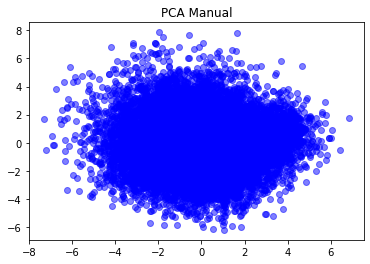

In [45]:
plt.scatter(Y[:,0],Y[:,1], c="blue", alpha=0.5, marker="o")
plt.title("PCA Manual")

## PCA con scikit-learn (2 dimensiones)

In [46]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(weights)
principal_PCA = pd.DataFrame(data = pca_result
             , columns = ['PCA_1', 'PCA_2'])

#Unimos con las palabras

#Convertimos el diccionario en una lista, obteniendo solo las palabras
words_list = [(k) for k in tokenizer.word_index.keys()]

wordsDF = pd.DataFrame(data=words_list, columns =["words"])
wordsDF.head()
PCA_DF=pd.concat([wordsDF,principal_PCA],axis=1)
PCA_DF.head()

,words,PCA_1,PCA_2
0,que,2.634024,1.492991
1,de,2.129200,0.892584
2,y,3.540762,1.245992
3,la,1.106287,1.729544
4,a,1.748344,5.360229


### Visualización en 2 dimensiones

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

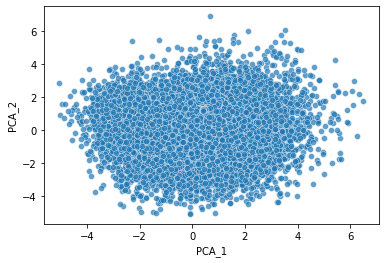

In [47]:
sns.scatterplot(x=PCA_DF["PCA_1"],y=PCA_DF["PCA_2"], alpha=0.7)

In [48]:
#Información recuperada en cada uno de los PCA
pca.explained_variance_ratio_

array([0.08017118, 0.07471053], dtype=float32)

### Cercania a una palabra

In [49]:
PCA_DF[PCA_DF["words"]=="quijote"]
#Recuperamios las coordenadas de la palabra elegida
x1=pd.to_numeric(PCA_DF[PCA_DF["words"]=="quijote"].iloc[0,1])
y1=pd.to_numeric(PCA_DF[PCA_DF["words"]=="quijote"].iloc[0,2])

In [50]:
#Calculo de distancia euclidea
display(Math(r"D_e(P_1,P_2)=\sqrt{(X_2-X_1)^2+(Y_2-Y_1)^2}"))

PCA_DF_DIST=np.sqrt((PCA_DF["PCA_1"]-x1)+(PCA_DF["PCA_2"]-y1))

PCA_DF_DIST=pd.concat([PCA_DF,PCA_DF_DIST],axis=1)
PCA_DF_DIST.head()

<IPython.core.display.Math object>

C:\Users\Educacem\Anaconda3\envs\MasterIA\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,words,PCA_1,PCA_2,0
0,que,2.634024,1.492991,2.232069
1,de,2.129200,0.892584,1.968985
2,y,3.540762,1.245992,2.375263
3,la,1.106287,1.729544,1.921185
4,a,1.748344,5.360229,2.822001


In [51]:
#Sacamos las n palabras más cercanas
n=10
WORD_DIST=PCA_DF_DIST.sort_values(by=[0]).head(n)

In [56]:
WORD_DIST[WORD_DIST["words"]=="quijote"]

,words,PCA_1,PCA_2,0
27,quijote,1.479735,-2.334854,0.0


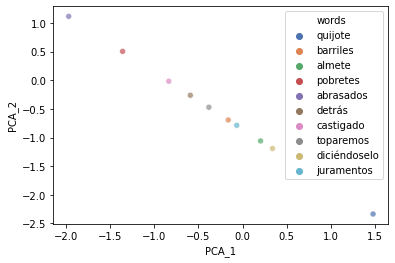

In [30]:
WORD_DIST.shape
g=sns.scatterplot(x="PCA_1",y="PCA_2", alpha=0.7, hue="words", palette="deep", data=WORD_DIST)

## PCA (3 dimensiones)

In [31]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(weights)
principal_PCA = pd.DataFrame(data = pca_result
             , columns = ['PCA_1', 'PCA_2', 'PCA_3'])
#Unimos con las palabras
wordsDF = pd.DataFrame(data=words_list, columns =["words"])
wordsDF.head()
PCA_DF=pd.concat([wordsDF,principal_PCA],axis=1)
PCA_DF.head()

,words,PCA_1,PCA_2,PCA_3
0,que,2.634071,1.493012,-0.989493
1,de,2.129276,0.892613,-0.425849
2,y,3.540686,1.246133,-0.638642
3,la,1.106396,1.729503,-1.402460
4,a,1.748032,5.360461,0.170399


In [32]:
#Información recuperada en cada uno de los PCA
pca.explained_variance_ratio_

array([0.08017115, 0.07471049, 0.05255456], dtype=float32)

<IPython.core.display.Javascript object>


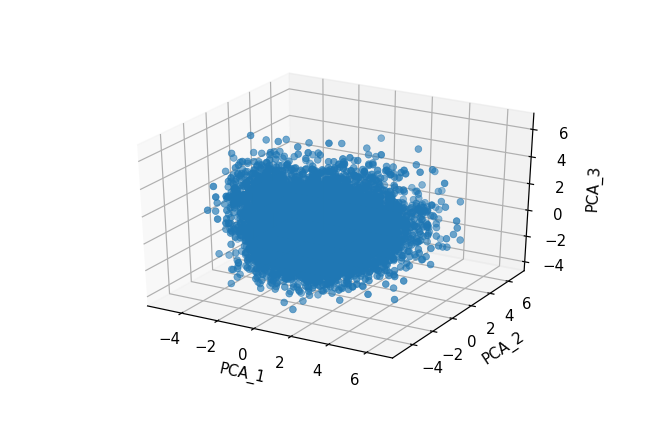

In [34]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=PCA_DF["PCA_1"], ys=PCA_DF["PCA_2"], zs=PCA_DF["PCA_3"], marker="o",linewidth=0.5)
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
plt.show()

## Proyecto Embedding
http://educa.europeanvalley.es/tools/IA/NLP/quijote/

In [ ]:
#Generamos los vectores
import io

out_v = io.open('embedding/vecs_quijote.tsv', 'w', encoding='utf-8')
out_m = io.open('embedding/meta_quijote.tsv', 'w', encoding='utf-8')

for num, word in enumerate(words_list):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

# TSNE (t-distributed stochastic neighbor embedding)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(weights)

In [ ]:
principal_TSNE = pd.DataFrame(data = tnse_results
             , columns = ['TSNE_1', 'TSNE_2'])

#Unimos con las palabras
TSNE_DF=pd.concat([wordsDF,principal_TSNE],axis=1)
TSNE_DF.head()

In [ ]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])